In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

In [4]:
df = pd.read_excel("C:\\Users\\ASUS\\Desktop\\IT Companies Analysis Project\\Output File\\IT_Stock_Companies.xlsx")

In [5]:

df.head()
df.shape
df.info()
df.describe()
df.isnull().sum()      
df.duplicated().sum() 
df['companies'].unique()
df['year'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   companies                 50 non-null     object 
 1   year                      50 non-null     int64  
 2   open_price                50 non-null     float64
 3   high_price                50 non-null     float64
 4   low_price                 50 non-null     float64
 5   close_price               50 non-null     float64
 6   no_of_shares              50 non-null     int64  
 7   no_of_trades              50 non-null     int64  
 8   total_turnover_(Rs)       50 non-null     int64  
 9   deliverable_quantity      50 non-null     int64  
 10  %_deli_qty_to_traded_qty  50 non-null     float64
 11  spread_(high-low)         50 non-null     float64
 12  spread_(close-open)       50 non-null     float64
dtypes: float64(7), int64(5), object(1)
memory usage: 5.2+ KB


array([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])

## 1) Trend Average Close Prices of IT compines Over Years.

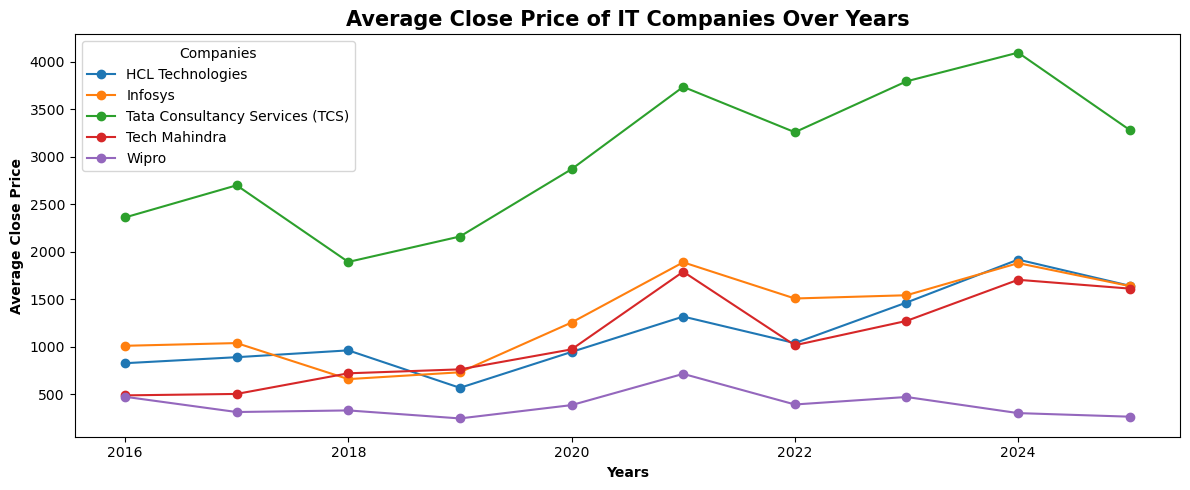

In [6]:
df.groupby("companies").mean(numeric_only=True)
df.groupby("year").sum(numeric_only=True)
ax = df.groupby(["year","companies"])["close_price"].mean().unstack().plot(figsize=(12,5), marker='o')
plt.xlabel("Years", fontweight="bold")
plt.ylabel("Average Close Price",fontweight="bold")
plt.title("Average Close Price of IT Companies Over Years", fontweight="bold",size=15,)
plt.legend(title="Companies")
plt.tight_layout()
plt.show()

----

## 2) Comperison of Average Close Price of the Companies.

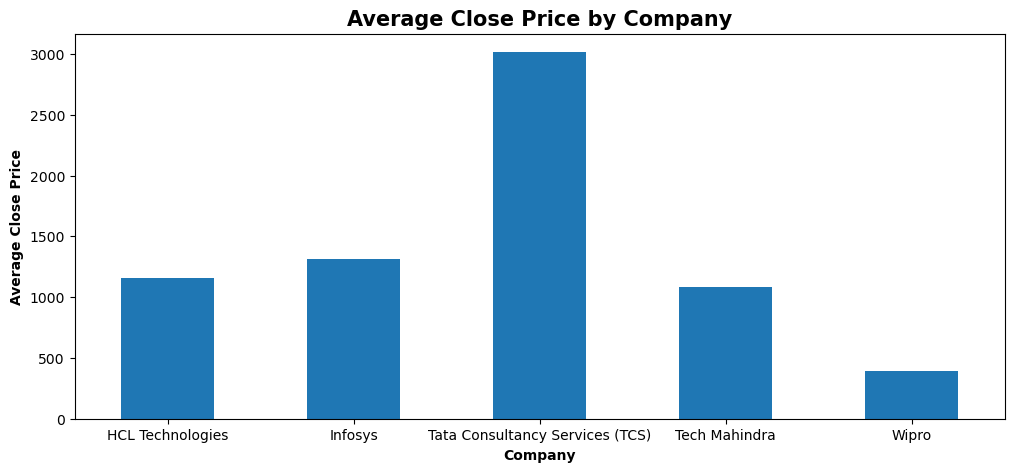

In [12]:
df.head()
df.groupby("companies")["close_price"].mean().plot(kind="bar", figsize=(12,5))
plt.title("Average Close Price by Company", fontweight="bold", size=15)
plt.xlabel("Company",fontweight="bold")
plt.ylabel("Average Close Price",fontweight="bold")
plt.xticks(rotation=360)
plt.show()

---

In [ ]:

df.head()

## 3)Open vs Close price comparison

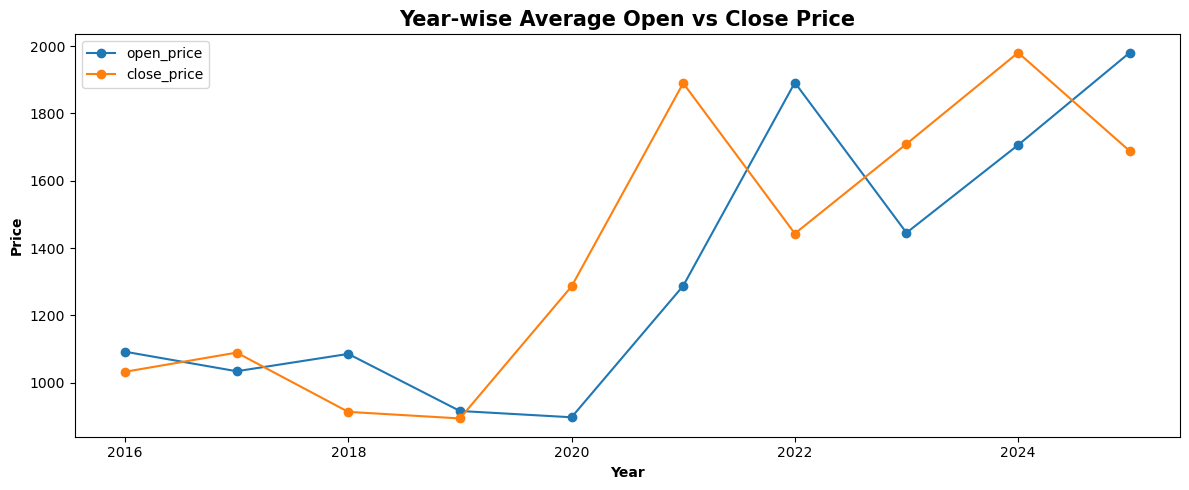

In [13]:
df.groupby("year")[["open_price","close_price"]].mean().plot(kind="line",figsize=(12,5),marker='o')
plt.title("Year-wise Average Open vs Close Price", fontweight="bold", size=15)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Price", fontweight="bold")
plt.tight_layout()
plt.show()

## 4)Price volatility (High − Low) per company

-----

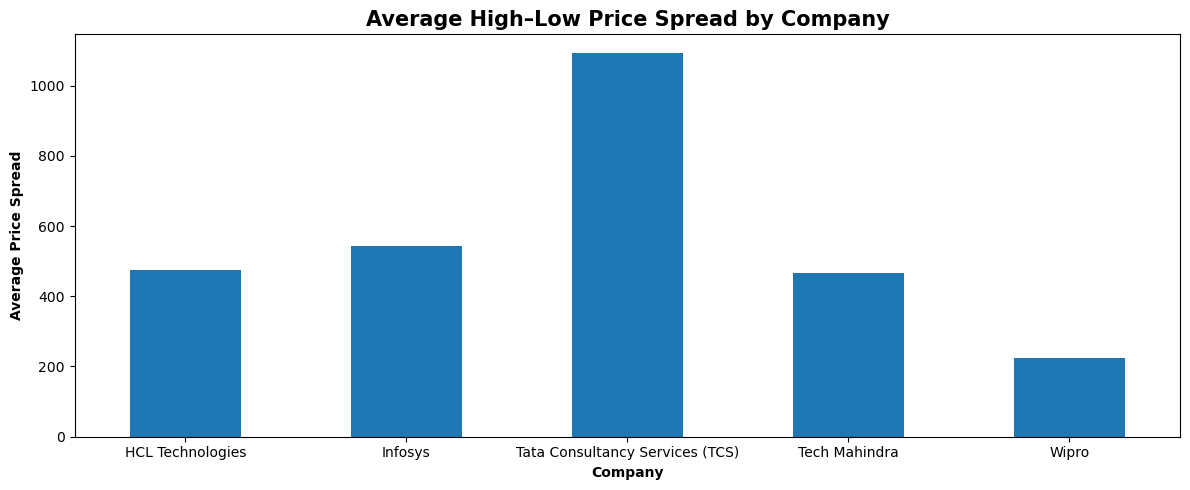

In [16]:
df.groupby("companies")["spread_(high-low)"].mean().plot(kind="bar", figsize=(12,5))
plt.title("Average High–Low Price Spread by Company", fontweight="bold", size=15)
plt.xlabel("Company", fontweight="bold")
plt.ylabel("Average Price Spread", fontweight="bold")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

----

# VOLUME & TRADING ANALYSIS

## 5) Which company has the highest number of trades?

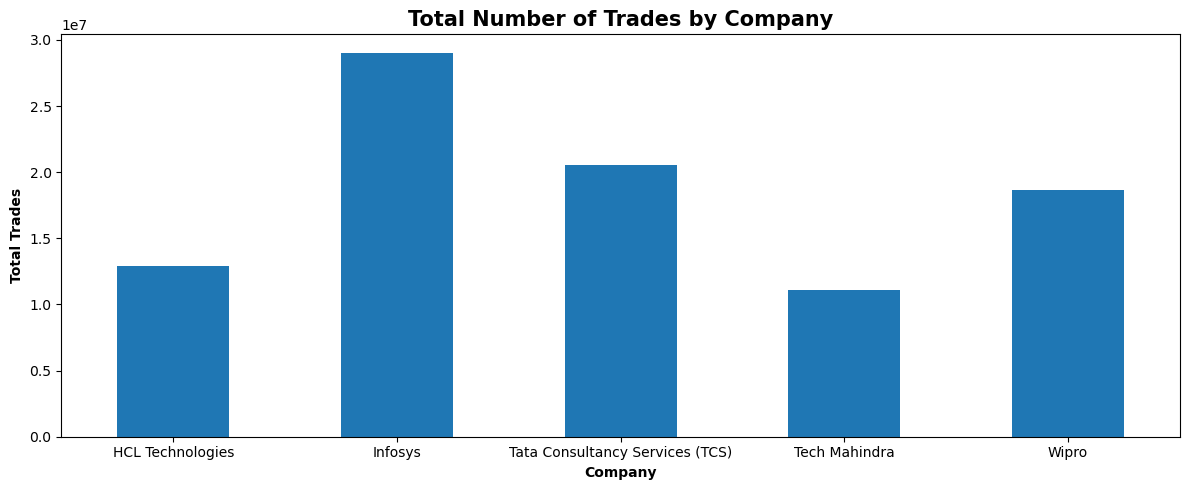

In [18]:
df.groupby("companies")["no_of_trades"].sum().plot( kind="bar", figsize=(12,5))
plt.title("Total Number of Trades by Company", fontweight="bold", size=15)
plt.xlabel("Company", fontweight="bold")
plt.ylabel("Total Trades", fontweight="bold")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

## 6️)Trend of traded shares over years

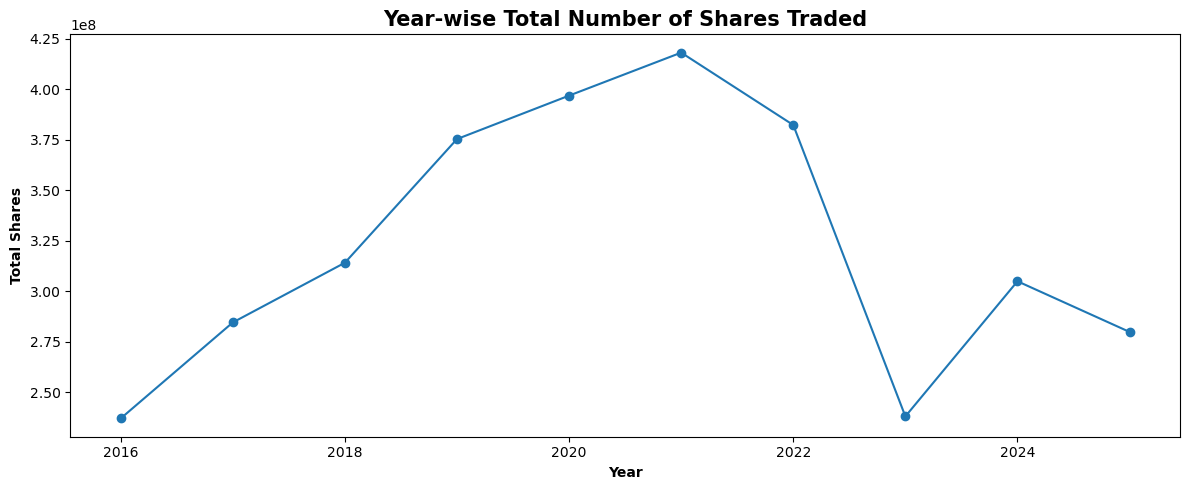

In [ ]:
df.groupby("year")["no_of_shares"].sum().plot( kind="line", figsize=(12,5),marker="o")
plt.title("Year-wise Total Number of Shares Traded", fontweight="bold", size=15)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Total Shares", fontweight="bold")
plt.tight_layout()
plt.show()


## 7)Relationship between shares traded and turnover

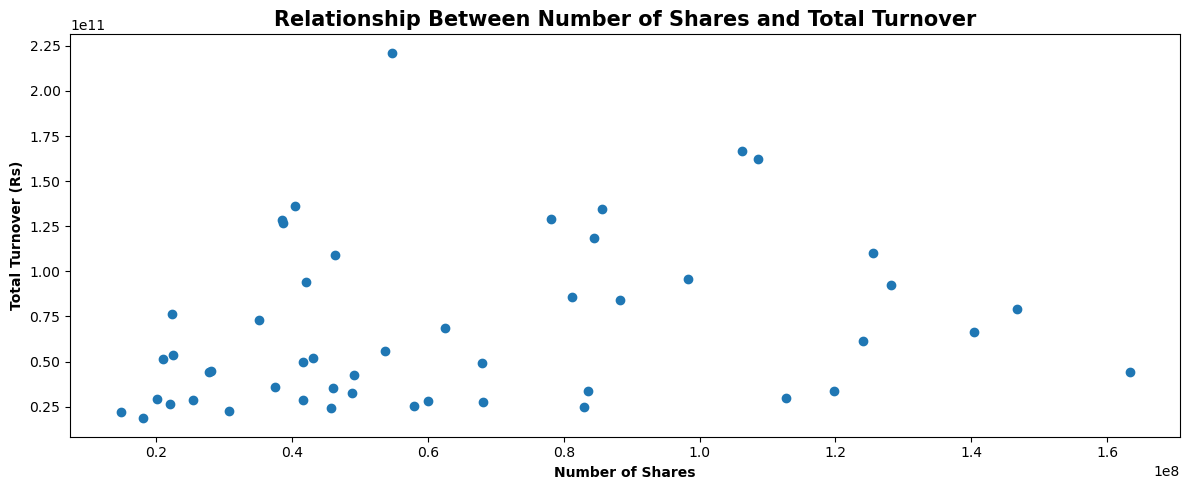

In [23]:
plt.figure(figsize=(12,5))
plt.scatter( df["no_of_shares"], df["total_turnover_(Rs)"])
plt.title("Relationship Between Number of Shares and Total Turnover", fontweight="bold", size=15)
plt.xlabel("Number of Shares", fontweight="bold")
plt.ylabel("Total Turnover (Rs)", fontweight="bold")
plt.tight_layout()
plt.show()


----

# TURNOVER & BUSINESS PERFORMANCE

## 8) Year-wise total turnover trend

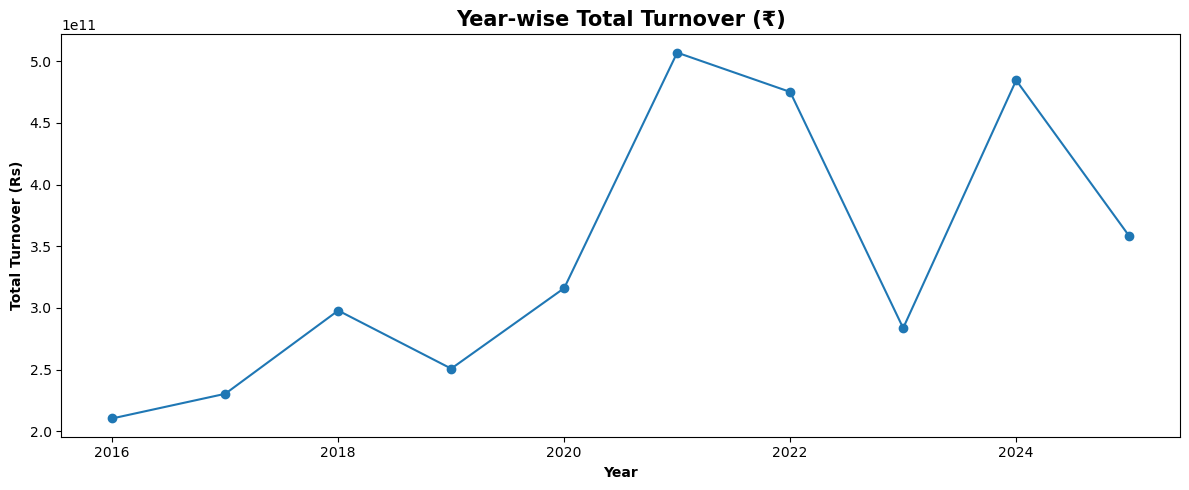

In [26]:
df.groupby("year")["total_turnover_(Rs)"].sum().plot(kind="line",figsize=(12,5),marker="o")
plt.title("Year-wise Total Turnover (₹)", fontweight="bold", size=15)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Total Turnover (Rs)", fontweight="bold")
plt.tight_layout()
plt.show()


## 9️) Company-wise contribution to turnover

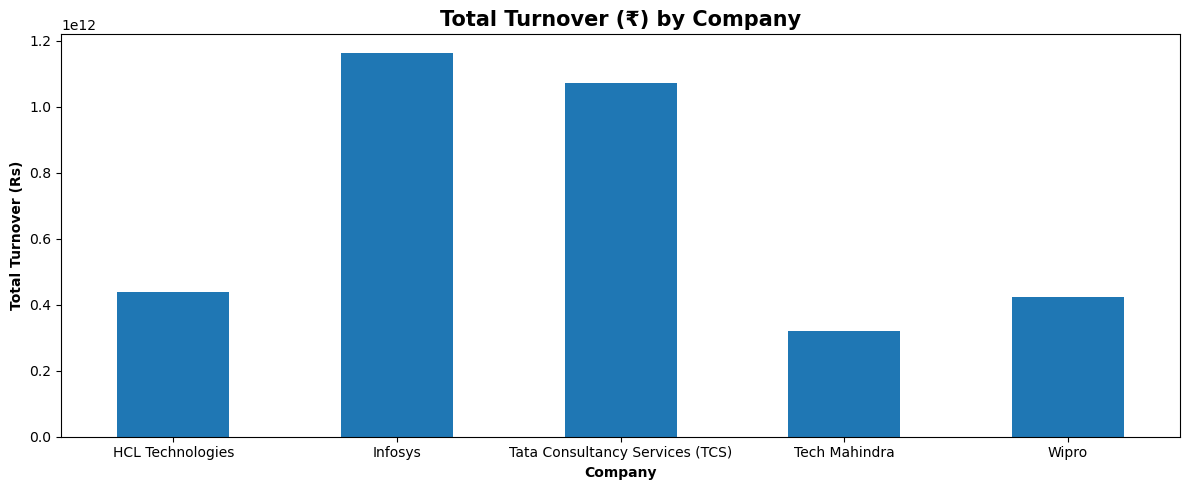

In [31]:
df.groupby("companies")["total_turnover_(Rs)"].sum().plot( kind="bar", figsize=(12,5))
plt.title("Total Turnover (₹) by Company", fontweight="bold", size=15)
plt.xlabel("Company", fontweight="bold")
plt.ylabel("Total Turnover (Rs)", fontweight="bold")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()


----

# DELIVERY ANALYSIS

## 10)Which company has highest delivery percentage?

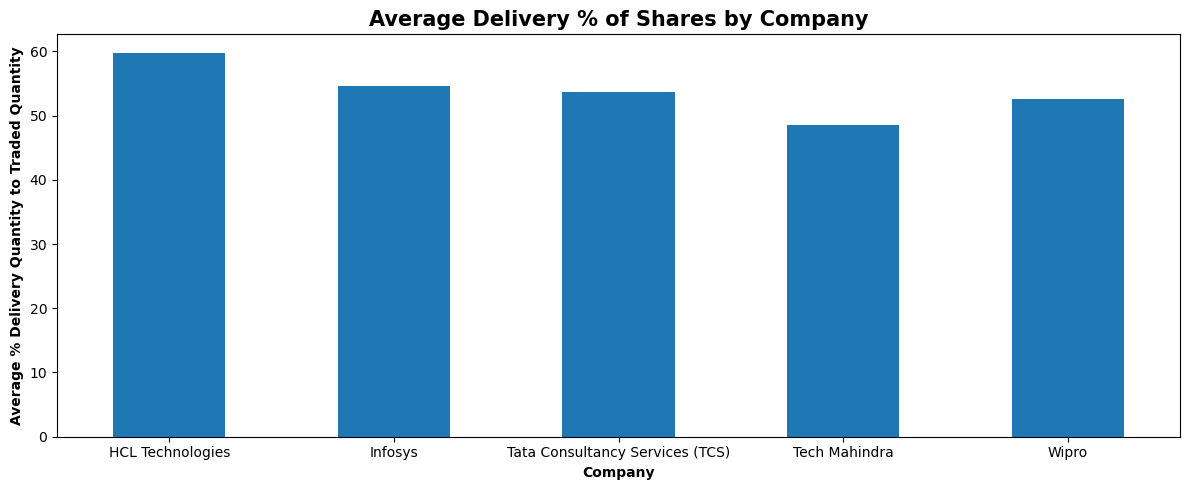

In [34]:
df.groupby("companies")["%_deli_qty_to_traded_qty"].mean().plot(kind="bar",figsize=(12,5))
plt.title("Average Delivery % of Shares by Company",fontweight="bold",size=15)
plt.xlabel("Company", fontweight="bold")
plt.ylabel("Average % Delivery Quantity to Traded Quantity",fontweight="bold")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()


## 11) Year-wise delivery trend

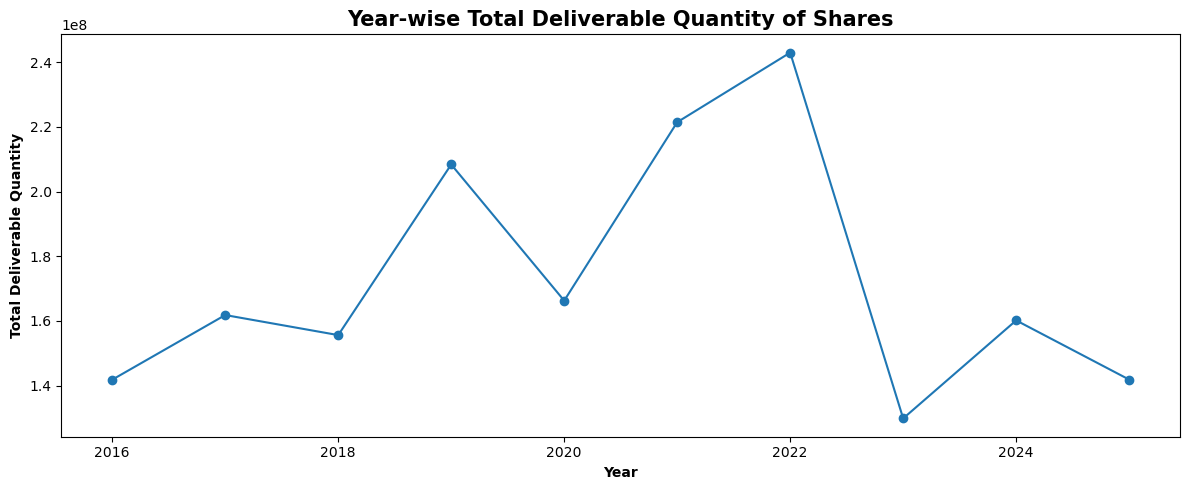

In [35]:
df.groupby("year")["deliverable_quantity"].sum().plot(kind="line", figsize=(12,5), marker="o")
plt.title("Year-wise Total Deliverable Quantity of Shares", fontweight="bold", size=15)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Total Deliverable Quantity", fontweight="bold")
plt.tight_layout()
plt.show()


----

# COMPARATIVE ANALYSIS

## 1️2) Compare close prices of top 3 companies

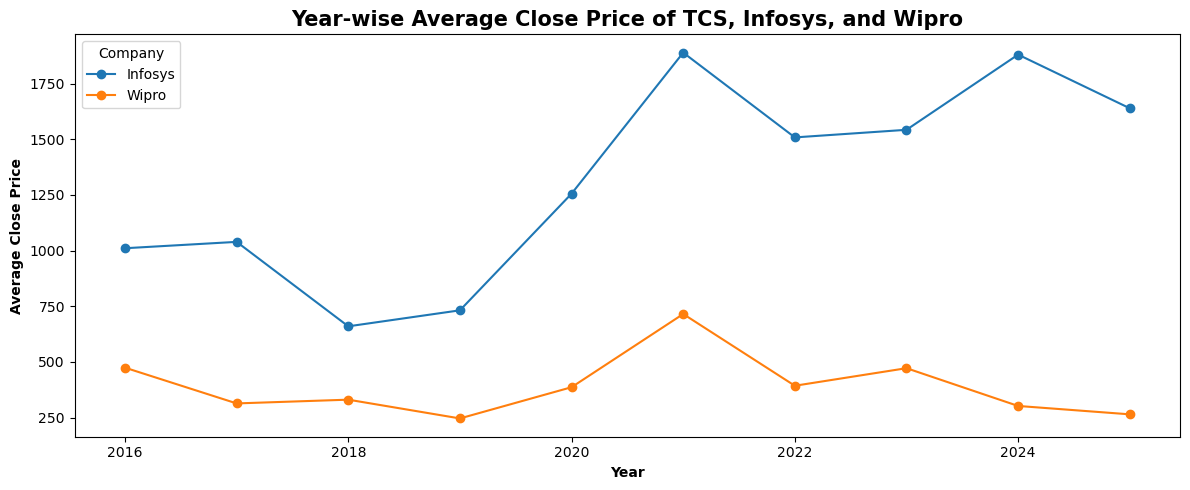

In [37]:
top = df[df["companies"].isin(["TCS", "Infosys", "Wipro"])]
top.groupby(["year", "companies"])["close_price"].mean().unstack().plot(figsize=(12,5),marker='o')
plt.title("Year-wise Average Close Price of TCS, Infosys, and Wipro", fontweight="bold", size=15)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Average Close Price", fontweight="bold")
plt.legend(title="Company")
plt.tight_layout()
plt.show()


## 1️3️) Open vs High vs Low vs Close distribution

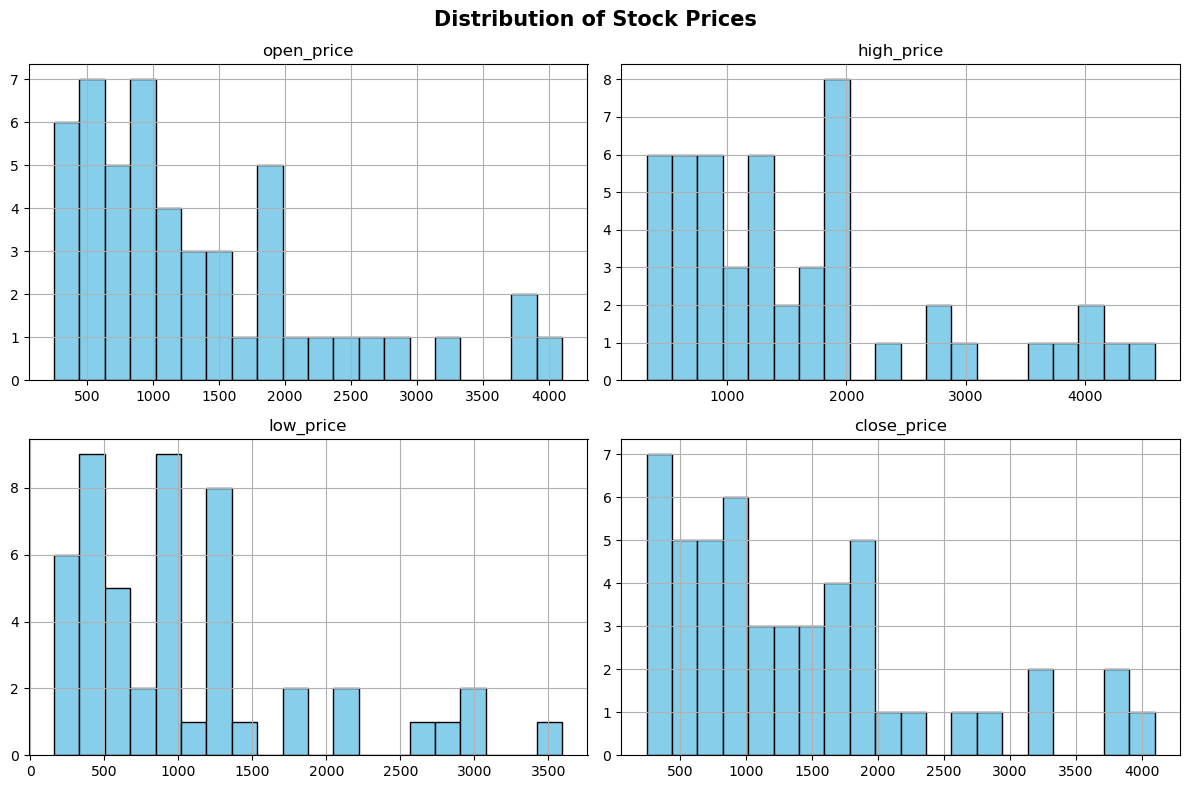

In [46]:
df[["open_price","high_price","low_price","close_price"]].hist(figsize=(12,8), bins=20,  color='skyblue',edgecolor='black')
plt.suptitle("Distribution of Stock Prices", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()


----

# SPREAD & RISK ANALYSIS

## 1️4️) Which company has highest price risk?

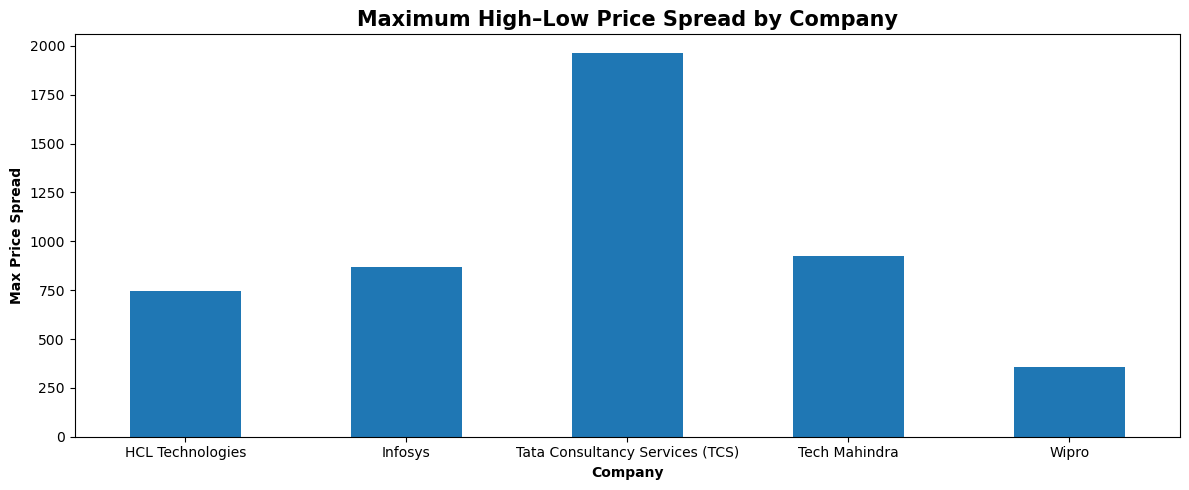

In [49]:
df.groupby("companies")["spread_(high-low)"].max().plot( kind="bar", figsize=(12,5))
plt.title("Maximum High–Low Price Spread by Company", fontweight="bold", size=15)
plt.xlabel("Company", fontweight="bold")
plt.ylabel("Max Price Spread", fontweight="bold")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()



## 1️5️) Close-Open spread trend

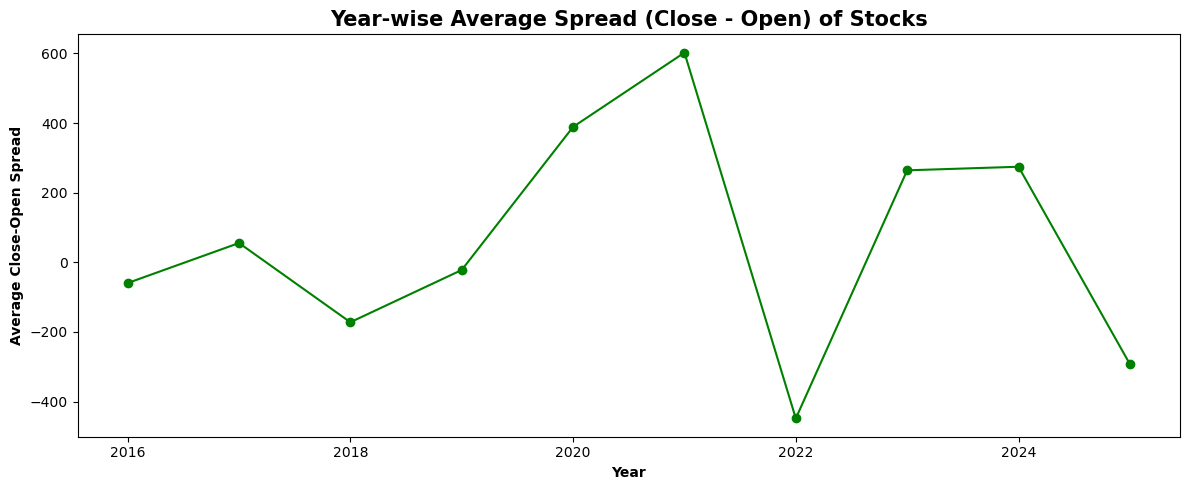

In [58]:
df.groupby("year")["spread_(close-open)"].mean().plot( kind="line", figsize=(12,5), marker='o', color='green')
plt.title("Year-wise Average Spread (Close - Open) of Stocks", fontweight="bold", size=15)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Average Close-Open Spread", fontweight="bold")
plt.tight_layout()
plt.show()


----

# STATISTICAL EDA

## 1️6️) Correlation between numeric variables

In [52]:
df.corr(numeric_only=True)


,year,open_price,high_price,low_price,close_price,no_of_shares,no_of_trades,total_turnover_(Rs),deliverable_quantity,%_deli_qty_to_traded_qty,spread_(high-low),spread_(close-open)
year,1.000000,0.322056,0.305894,0.295176,0.324443,0.017314,0.541730,0.298510,0.003117,-0.064768,0.258878,0.025353
open_price,0.322056,1.000000,0.976516,0.967370,0.924117,-0.446691,0.316219,0.621432,-0.369646,0.193166,0.774187,-0.137198
high_price,0.305894,0.976516,1.000000,0.966234,0.959674,-0.444003,0.299385,0.643167,-0.385004,0.119428,0.843646,0.014454
low_price,0.295176,0.967370,0.966234,1.000000,0.967347,-0.453407,0.274970,0.623620,-0.372118,0.213357,0.676819,0.057511
close_price,0.324443,0.924117,0.959674,0.967347,1.000000,-0.457691,0.284035,0.613180,-0.401111,0.113939,0.726116,0.251708
no_of_shares,0.017314,-0.446691,-0.444003,-0.453407,-0.457691,1.000000,0.471302,0.246506,0.948239,-0.054240,-0.323748,-0.055100
no_of_trades,0.541730,0.316219,0.299385,0.274970,0.284035,0.471302,1.000000,0.727657,0.491350,0.076568,0.282383,-0.064612
total_turnover_(Rs),0.298510,0.621432,0.643167,0.623620,0.613180,0.246506,0.727657,1.000000,0.314145,0.214978,0.538082,0.015592
deliverable_quantity,0.003117,-0.369646,-0.385004,-0.372118,-0.401111,0.948239,0.491350,0.314145,1.000000,0.225913,-0.324569,-0.103566
%_deli_qty_to_traded_qty,-0.064768,0.193166,0.119428,0.213357,0.113939,-0.054240,0.076568,0.214978,0.225913,1.000000,-0.103367,-0.193885



## 1️7️) Distribution of closing prices

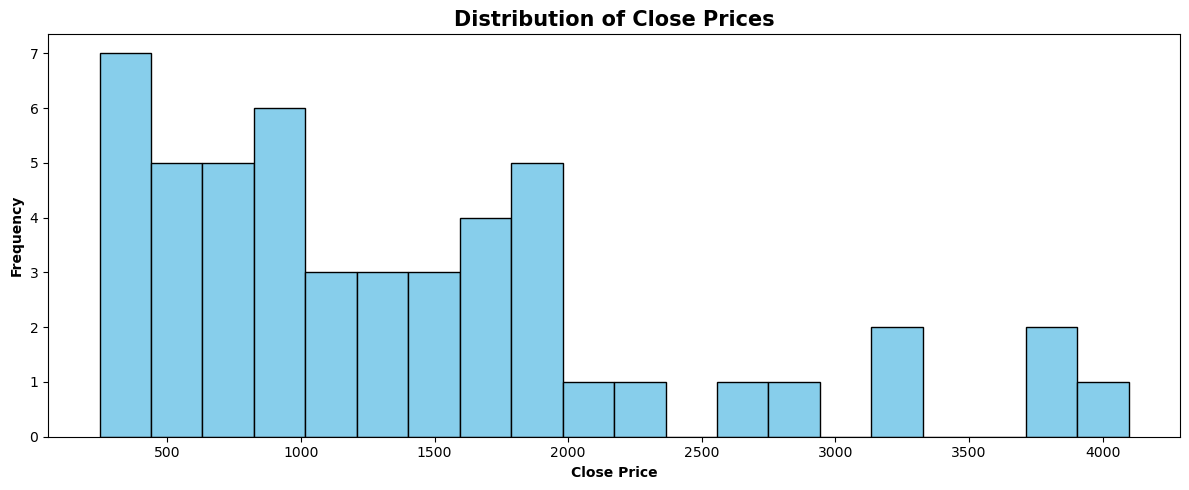

In [61]:
plt.figure(figsize=(12,5))
plt.hist( df["close_price"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Close Prices", fontweight="bold", size=15)
plt.xlabel("Close Price", fontweight="bold")
plt.ylabel("Frequency", fontweight="bold")
plt.tight_layout()
plt.show()


----

# ADVANCED BUSINESS QUESTIONS

## 18)Which year was best for IT stocks?

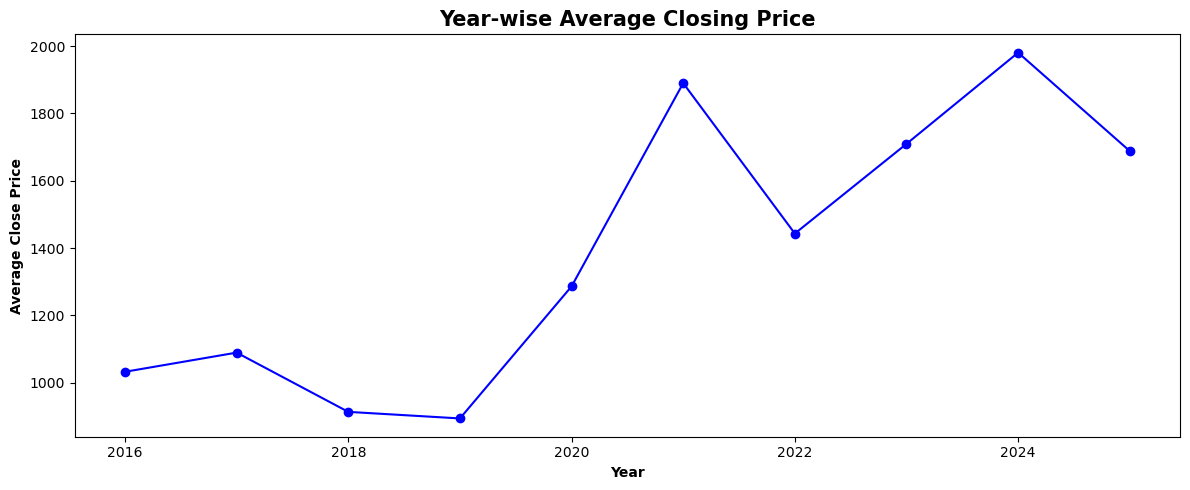

In [64]:
df.groupby("year")["close_price"].mean().plot(kind="line",figsize=(12,5),marker='o',color='blue')
plt.title("Year-wise Average Closing Price", fontweight="bold", size=15)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Average Close Price", fontweight="bold")
plt.tight_layout()
plt.show()


## 1️9️) Company consistency (low spread)

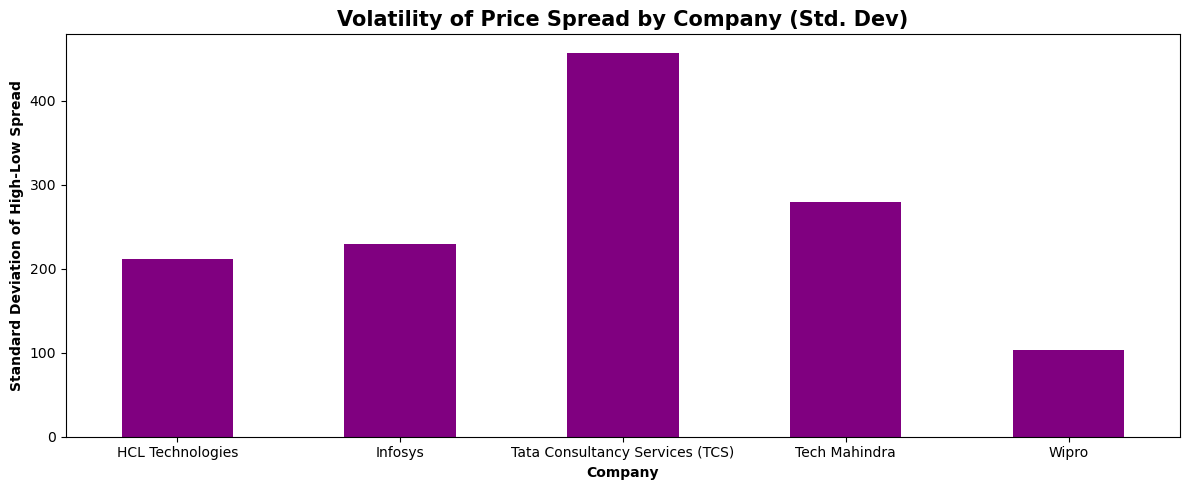

In [66]:
df.groupby("companies")["spread_(high-low)"].std().plot(kind="bar", figsize=(12,5), color='purple')
plt.title("Volatility of Price Spread by Company (Std. Dev)", fontweight="bold", size=15)
plt.xlabel("Company", fontweight="bold")
plt.ylabel("Standard Deviation of High-Low Spread", fontweight="bold")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()


## 2️0️) Identify outliers in closing price

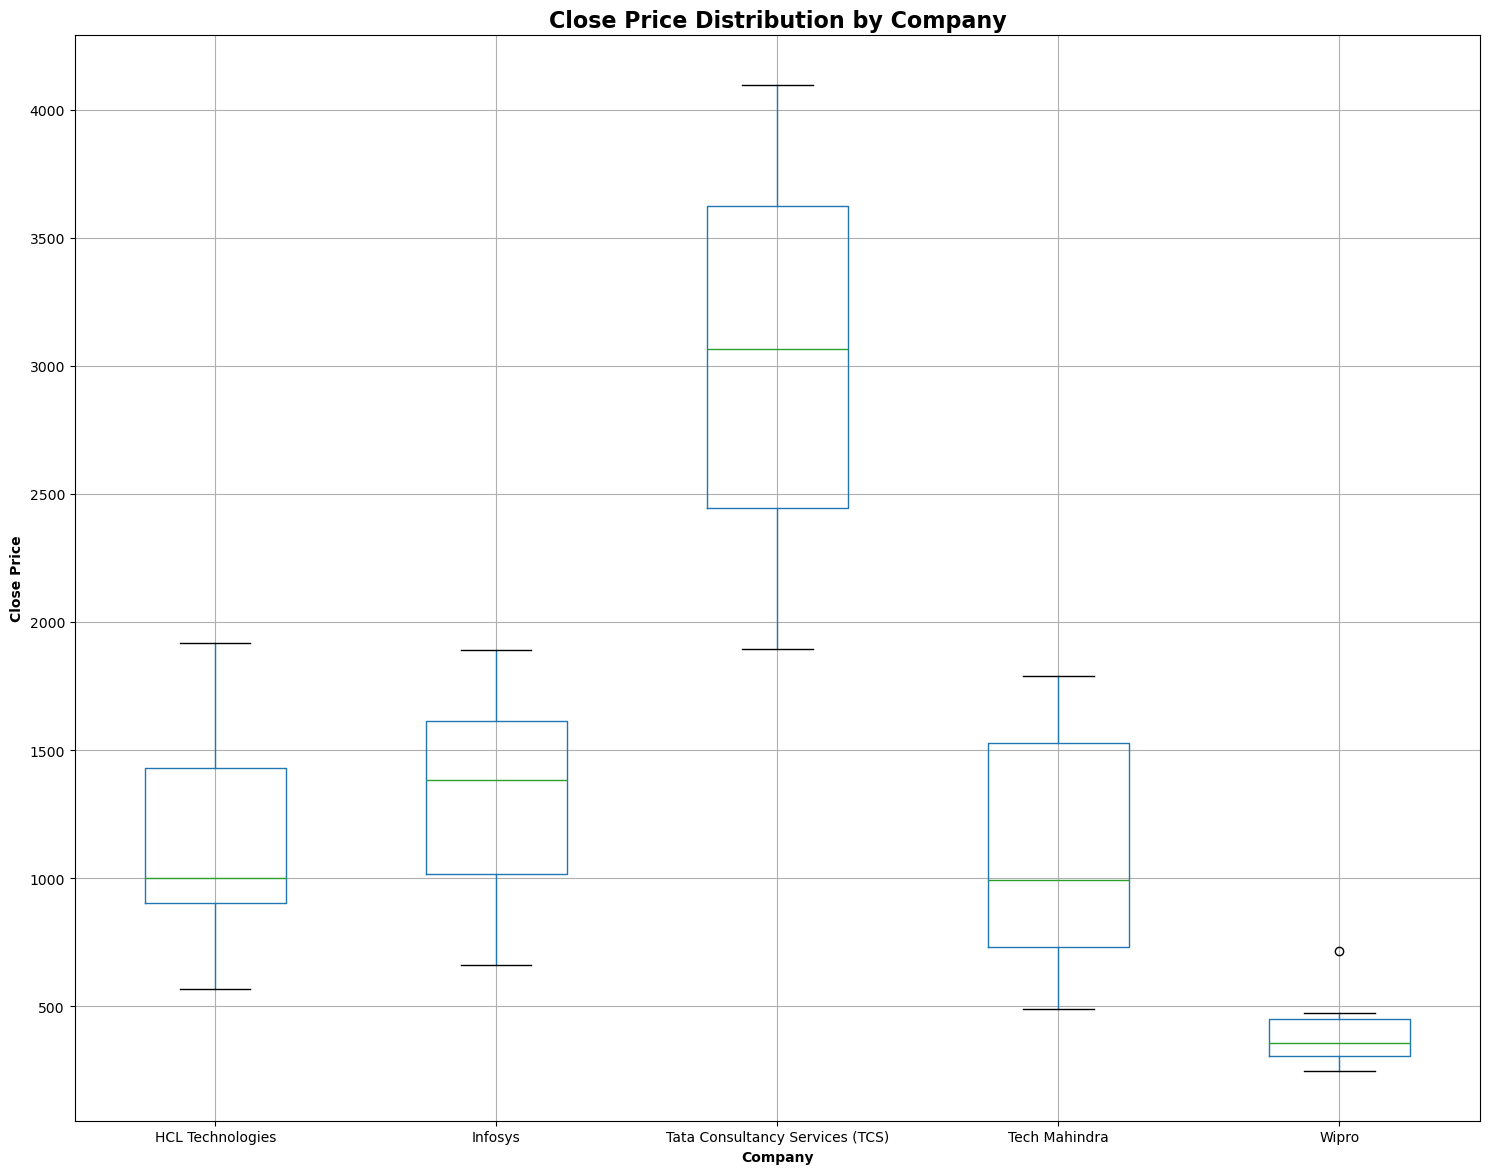

In [88]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 12))   # ⬅️ increase WIDTH here

df.boxplot(
    column="close_price",
    by="companies",
    grid=True,
    ax=ax
)

ax.set_title("Close Price Distribution by Company", fontweight="bold", fontsize=16)
fig.suptitle("")
ax.set_xlabel("Company", fontweight="bold")
ax.set_ylabel("Close Price", fontweight="bold")
plt.xticks(rotation=360)

plt.tight_layout()
plt.show()


-----